In [9]:
'''
Author: jirufengyu
Date: 2020-10-29 09:12:25
LastEditTime: 2020-10-29 11:44:19
LastEditors: jirufengyu
Description: In User Settings Edit+
FilePath: /Signal-1/AE2-Nets-master/tSNE.py
'''
import h5py
import os
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
data_path="/home/stu2/Signal-1/H.mat"

dataset = scipy.io.loadmat(data_path)
H,gt=dataset['H'],dataset['gt']
print(H)
gt=gt[0]
# 对样本进行预处理并画图
def plot_embedding(data, label ):
    """
    :param data:数据集
    :param label:样本标签
    :param title:图像标题
    :return:图像
    """
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)     # 对数据进行归一化处理
    fig = plt.figure()      # 创建图形实例
    ax = plt.subplot(111)       # 创建子图
    # 遍历所有样本
    for i in range(data.shape[0]):
        # 在图中为每个数据点画出标签
        plt.scatter(data[i, 0], data[i, 1], color=plt.cm.Set1(label[i] / 10),s=4)
                 #fontdict={'weight' :  'bold' ,  'size' : 10})
    plt.xticks()        # 指定坐标的刻度
    plt.yticks()
    #plt.title("asdf", fontsize=14)
    # 返回值
    return fig



[[-0.10193896  0.00042497  0.038651   ...  0.01204502 -0.25182992
   0.1229299 ]
 [-0.09233911  0.10682646 -0.08593237 ... -0.05107445  0.17715706
   0.05573349]
 [ 0.00308511  0.16291414  0.02916491 ...  0.08718929  0.1552995
   0.20625482]
 ...
 [-0.14946783  0.0239071   0.08475218 ...  0.00109044  0.40235114
   0.0824458 ]
 [-0.23062055  0.12898888  0.01567322 ...  0.34567302 -0.11107886
  -0.09066198]
 [ 0.10871736 -0.16452089  0.09641931 ...  0.24840309  0.20893741
   0.12962846]]


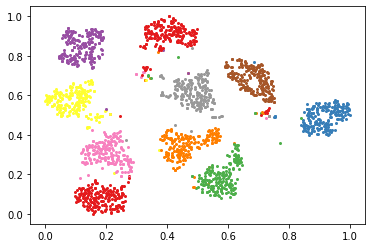

In [10]:

tsne = TSNE(n_components=2, init='pca', random_state=0)

result = tsne.fit_transform(H)
fig = plot_embedding(result,gt)
plt.show(fig)